# # Importing the required library Initially for getting data:-

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Get Data set:-

In [3]:
data=pd.read_csv('Data.csv')
data.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.shape

(12684, 25)

# # Handle Duplicated Data

In [5]:
data.duplicated().sum()

291

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

# # Checking missing values:-

In [8]:
data.isnull().sum()/len(data)*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.144678
Bar                      0.855322
CoffeeHouse              1.734850
CarryAway                1.194223
RestaurantLessThan20     1.032841
Restaurant20To50         1.516985
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

# # Obeservation from above output of null values:
     1. 'car' has 99% of missing values, it makes this variables least important. So its better to drop this.  

In [9]:
# Droping 'car' feature:
#"Dropping/removal of duplicated data is performed to ensure a high variety of rows, thereby making the training data for the machine learning model more accurate."

data.drop('car', axis=1, inplace=True)

In [10]:
data.isnull().sum()/len(data)*100

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
Bar                     0.855322
CoffeeHouse             1.734850
CarryAway               1.194223
RestaurantLessThan20    1.032841
Restaurant20To50        1.516985
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Accept(Y/N?)            0.000000
dtype: float64

# # Observation from above null findings is below variable remaining with null values:-
   1. Bar                     0.843582
   2. CoffeeHouse             1.710817
   3. CarryAway               1.190476
   4. RestaurantLessThan20    1.024913
   5. Restaurant20To50        1.490066
    

# # Mode imputation for missing values in data:

    1. Finding the value of 'mode' to fill in each give column in place of 'null' values.
    2. Filling the above found 'mode' in place of each 'null' values.

In [11]:
columns_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for i in columns_to_impute:
    mode_column = data[i].mode().iloc[0]  
    data[i].fillna(mode_column, inplace=True) 

# # Checking in below code which variables has how many sub-categories inside:-

In [12]:
data.nunique()

destination              3
passanger                4
weather                  3
temperature              3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Accept(Y/N?)             2
dtype: int64

In [13]:
data.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Accept(Y/N?)         2
dtype: int64

# # Obeservation from above output of data types:
     1. 'tocoupon_GEQ5min' is having only one value i.e=1 only for each row, so it is also become neutral and the no very important for model building. So, we can drop this too.

In [14]:
# Droping 'toCoupon_GEQ5min' feature:

data.drop('toCoupon_GEQ5min', axis=1, inplace=True)

In [15]:
# Rechecking all nul values again and should be no null value now as we have done all imputing and droping as needed:
data.isnull().sum()/len(data)*100

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Accept(Y/N?)            0.0
dtype: float64

# # Re-naming the Target Variable for easy understanding:-

In [16]:
data.rename(columns={'Accept(Y/N?)':'Coupon Accepted (Y/N)'}, inplace=True)

# here 'Y' means 1, and 'N' means value 0.

In [17]:
# Checking the remaining columns:-

data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp',
       'Coupon Accepted (Y/N)'],
      dtype='object')

# # Handling Outliers:

In [18]:
pd.set_option('display.max_columns', None)
data.describe(include='all')

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon Accepted (Y/N)
count,12393,12393,12393,12393.000000,12393,12393,12393,12393,12393,12393.000000,12393,12393,12393,12393,12393,12393,12393,12393,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000
unique,3,4,3,NaN,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN
freq,6118,7178,9862,NaN,3913,6938,6355,2598,4994,NaN,4260,1828,1972,5195,3525,4719,5397,6134,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.252643,NaN,NaN,NaN,NaN,NaN,0.415557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563625,0.118051,0.213750,0.786250,0.565803
std,NaN,NaN,NaN,19.075396,NaN,NaN,NaN,NaN,NaN,0.492838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495955,0.322681,0.409969,0.409969,0.495671
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,1.000000


- "No handling of outliers is performed because each feature's data type is categorical; therefore, there are no extreme values. Furthermore, the values are still reasonable for further processing."

# # Feature Extraction:

- From above description we can see that maximum unique values are in 'age' and 'occupation' columns. 
- 'age' has 8 and 'occupation' has 25 unique values/features.
- SO WE WILL TRY TO MINIMIZE THESE BY INDENTIFYING THEIR INSIDE QUALITY AND STRUCTURE.

In [19]:
data_dummy = data.copy()

# # Re-ranging the 'age' column to minimize the sub-values:-

In [20]:
data_dummy['age'].value_counts()

21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079
46          660
below21     537
Name: age, dtype: int64

# # From above we can make a range structure which will be more relavant for better understanding the data.

In [21]:
#categorize it to be more simple
age_list = []
for i in data_dummy['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
data_dummy['age'] = age_list

In [22]:
# Again checking new age unique value
data_dummy['age'].value_counts()

21-30    5084
31-40    3277
>50      1756
41-50    1739
<21       537
Name: age, dtype: int64

# # Re-ranging the 'occupation' column to minimize the sub-categories:-

In [23]:
data_dummy['occupation'].value_counts()

Unemployed                                   1828
Student                                      1550
Computer & Mathematical                      1360
Sales & Related                              1066
Education&Training&Library                    921
Management                                    806
Office & Administrative Support               631
Arts Design Entertainment Sports & Media      617
Business & Financial                          536
Retired                                       489
Food Preparation & Serving Related            293
Healthcare Support                            237
Healthcare Practitioners & Technical          237
Community & Social Services                   236
Legal                                         218
Transportation & Material Moving              214
Architecture & Engineering                    172
Personal Care & Service                       172
Protective Service                            172
Life Physical Social Science                  168


In [24]:
occupation_list = []
for i in data_dummy['occupation']:
    if i == 'Installation Maintenance & Repair' or i == 'Transportation & Material Moving' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Crafts'
    elif i == 'Architecture & Engineering' or i == 'Education&Training&Library' or i == 'Healthcare Practitioners & Technical' or i == 'Management' or i == 'Arts Design Entertainment Sports & Media' or i == 'Computer & Mathematical' or i == 'Legal' or i == 'Business & Financial':
        occupation = 'Professionals'
    elif i == 'Retired':
        occupation = 'Retired'
    elif i == 'Sales & Related' or i == 'Personal Care & Service' or i == 'Protective Service':
        occupation = 'Service and sales'
    elif i == 'Student':
        occupation = 'Student'
    elif i == 'Healthcare Support' or i == 'Life Physical Social Science' or i == 'Community & Social Services' or i == 'Construction & Extraction':
        occupation = 'Technicians'
    elif i == 'Unemployed':
        occupation = 'Unemployed'
    else:
        occupation = 'Others'
    occupation_list.append(occupation)
data_dummy['occupation'] = occupation_list

In [25]:
#checking occupation unique value
data_dummy['occupation'].value_counts()

Professionals        4867
Unemployed           1828
Student              1550
Service and sales    1410
Technicians           791
Others                780
Crafts                678
Retired               489
Name: occupation, dtype: int64

# # Checking the correlations between numerical features:-
    *** for this we need to import below libraries also to write code further:-

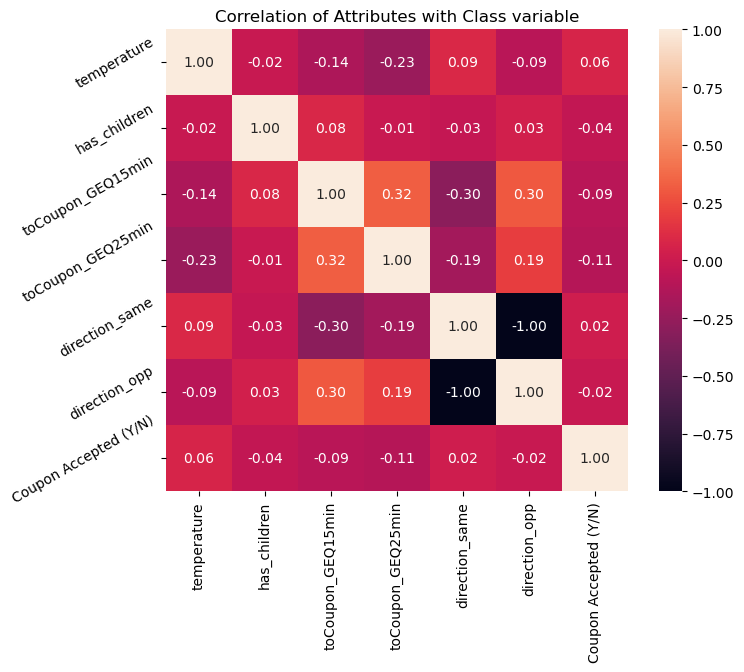

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation= data.corr()

plt.figure(figsize=(8,6))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

# # Observations from above correlation matrix:-
    1. "toCoupon_GEQ15min" and "toCoupon_GEQ25min" are correlated by .32, so these are moderatly correlated.
    2. "direction_same" and "direction_opp" are completly uncorrelated as on -1 each shown above figure.

# # lets Check the relationship further among these features:-


In [27]:
proportions =data_dummy.groupby(['toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'Coupon Accepted (Y/N)']).size() / len(data_dummy)

proportions = proportions.reset_index(name='Proportion')

pivot_table = proportions.pivot_table(index=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], columns='Coupon Accepted (Y/N)', values='Proportion', fill_value=0)

print(pivot_table)


Coupon Accepted (Y/N)                       0         1
toCoupon_GEQ15min toCoupon_GEQ25min                    
0                 0                  0.168321  0.268055
1                 0                  0.197369  0.248205
                  1                  0.068506  0.049544


# # Observation from above output:- these are Driving duration taken:
    1. It shows three categories of combinations as (0,0) when both have zero, (1,0) when ('toCoupon_GEQ15min') is 1 and ('toCoupon_GEQ25min') is zero and (1,1) when both are one.
    
    2. When both have zero, Basically it means no-one accepted coupon here from any driving-durantion.
    3. where ('toCoupon_GEQ15min') is 1 and ('toCoupon_GEQ25min') is zero, means there driving durantion is less 25mnt who accepted the coupons.
    4. Where (1,1) both are one, it means that if someone coming with driving duration of 25mnt he is anyways covering the 15mnt so accepted the coupon for both timings.
    5. Hence, there is no column value where it should be ('toCoupon_GEQ15min') is 0 and ('toCoupon_GEQ25min') is 1. It means that not possible to cover 25mnt without covering the duration of 15mnts.
    

In [28]:
data_dummy['Combined_driving_time'] = data_dummy['toCoupon_GEQ15min'] + data_dummy['toCoupon_GEQ25min']

In [29]:
# Droping 'toCoupon_GEQ15min' and 'toCoupon_GEQ25min' features:

data_dummy.drop(columns=['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1, inplace=True)

# # Also, in above correlation matrix we found 'direction_same' and 'direction_opp' exactly opposite of each other.
- So we can choose to keep one of them or can remove one of these to avoid multicollinearity, beacuse if we keep both that can lead to unstable model behavior. but if we remove any one of these then we can avoid the impact of 'direction_opp'.
- Also, when we analyse we find that these both are somewhere correlated with 'toCoupon_GEQ15min' and 'toCoupon_GEQ25min', So it is better to keep both these variables.

# # Data also shows us some correlation among below characterstic-numeric columns:-

In [30]:
data_dummy['temperature_weather'] = data_dummy['temperature'].astype(str) + '-' + data_dummy['weather'].astype(str)
data_dummy['marital_hasChildren'] = data_dummy['maritalStatus'].astype(str) + '-' + data_dummy['has_children'].astype(str)
data_dummy['passanger_destination'] = data_dummy['passanger'].astype(str) + '-' + data_dummy['destination'].astype(str)

In [31]:
data_dummy = data_dummy.drop(columns=['passanger', 'destination', 'maritalStatus', 'has_children', 'temperature','weather'])

In [32]:
data_dummy.select_dtypes('int64').nunique()

direction_same           2
direction_opp            2
Coupon Accepted (Y/N)    2
Combined_driving_time    3
dtype: int64

In [33]:
data_dummy.head(5)

,coupon,expiration,gender,age,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Coupon Accepted (Y/N),Combined_driving_time,temperature_weather,marital_hasChildren,passanger_destination
0,Restaurant(<20),1d,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,0,55-Sunny,Unmarried partner-1,Alone-No Urgent Place
1,Coffee House,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,0,80-Sunny,Unmarried partner-1,Friend(s)-No Urgent Place
2,Carry out & Take away,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,1,80-Sunny,Unmarried partner-1,Friend(s)-No Urgent Place
3,Coffee House,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,1,80-Sunny,Unmarried partner-1,Friend(s)-No Urgent Place
4,Coffee House,1d,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,0,1,80-Sunny,Unmarried partner-1,Friend(s)-No Urgent Place


# # Visualing the dataset among all variables:-

- Coupon Accepted Yes vs No:-

Text(0.5, 1.0, 'Coupon Accepted (Y/N)')

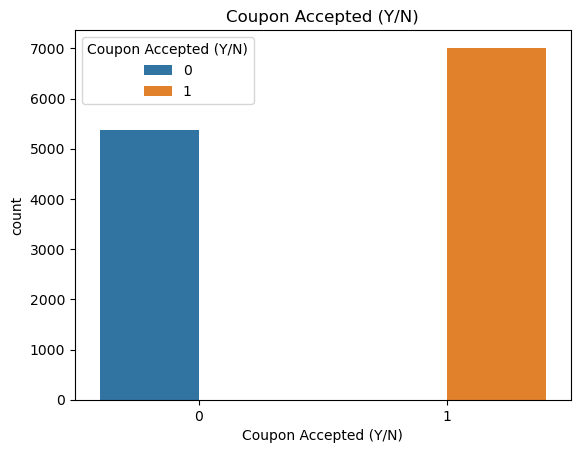

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Coupon Accepted (Y/N)',data=data_dummy,hue='Coupon Accepted (Y/N)')
plt.title("Coupon Accepted (Y/N)")

# # Visualize all charatersitic variables available in dataset:-

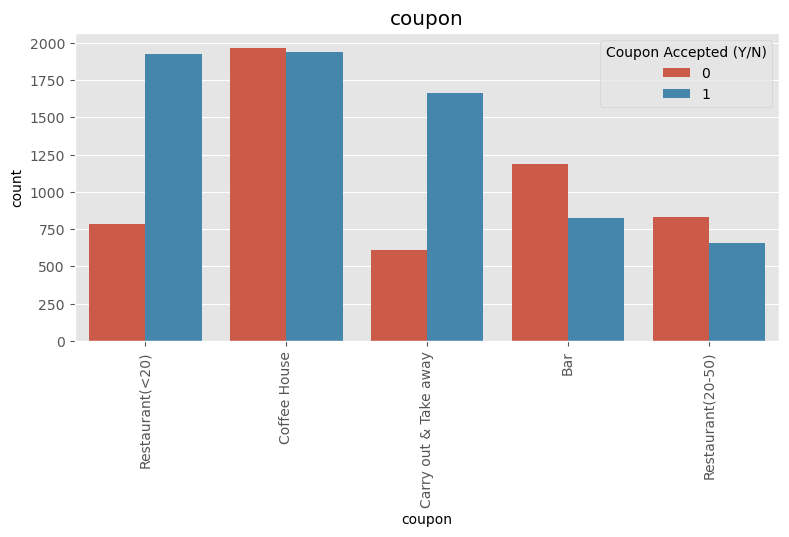

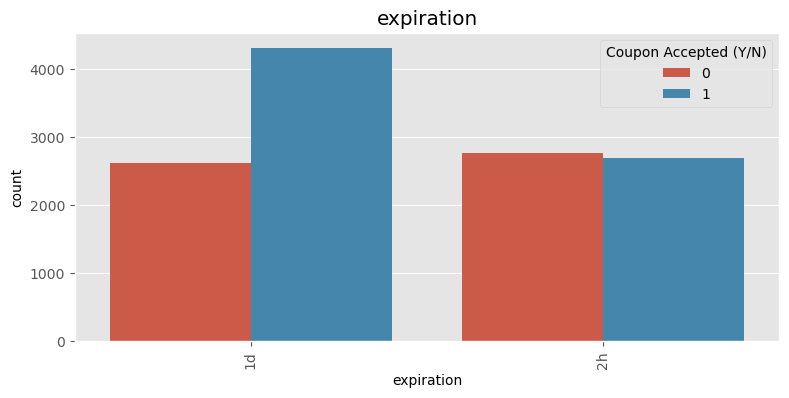

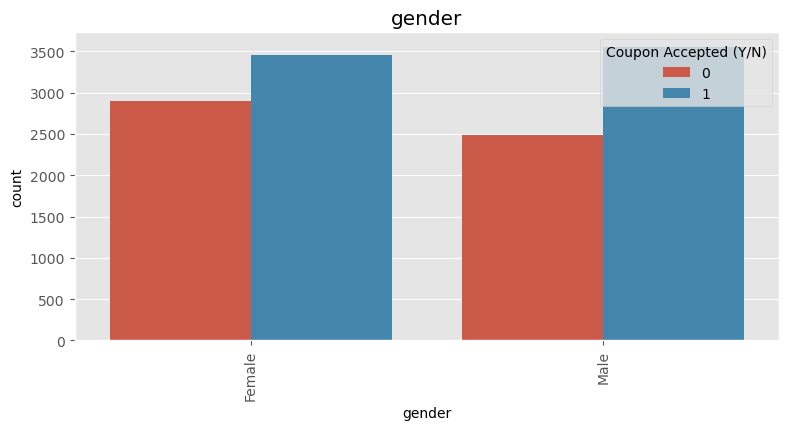

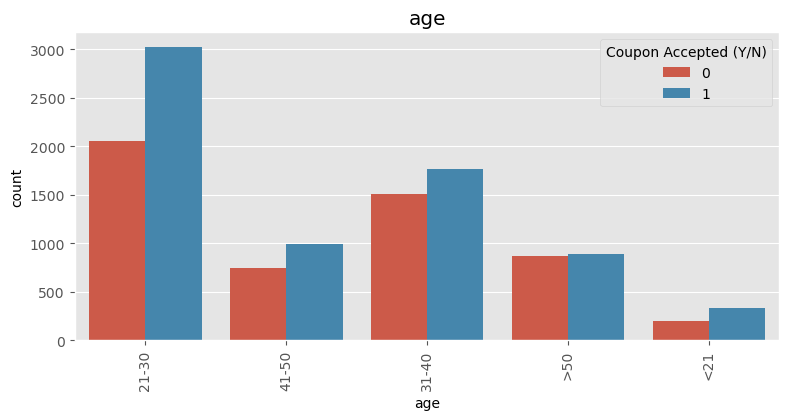

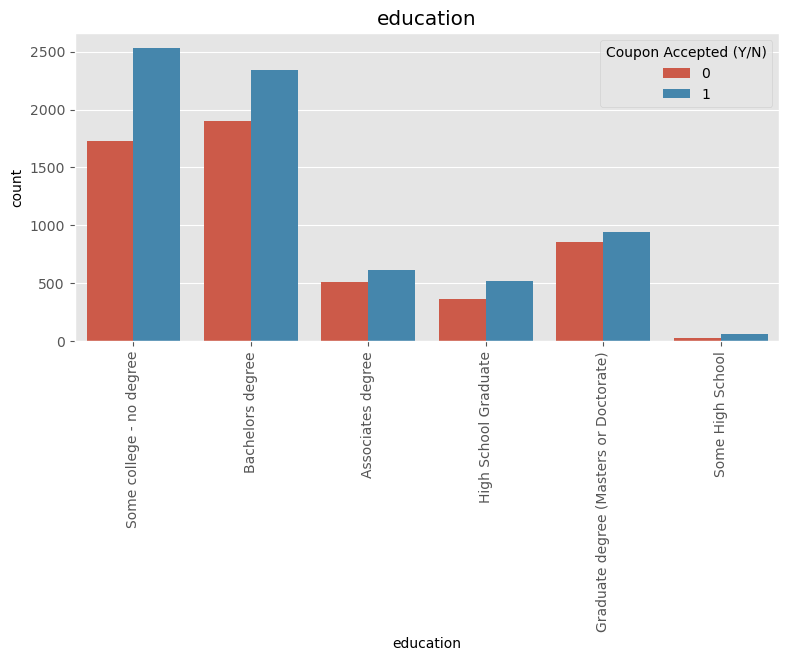

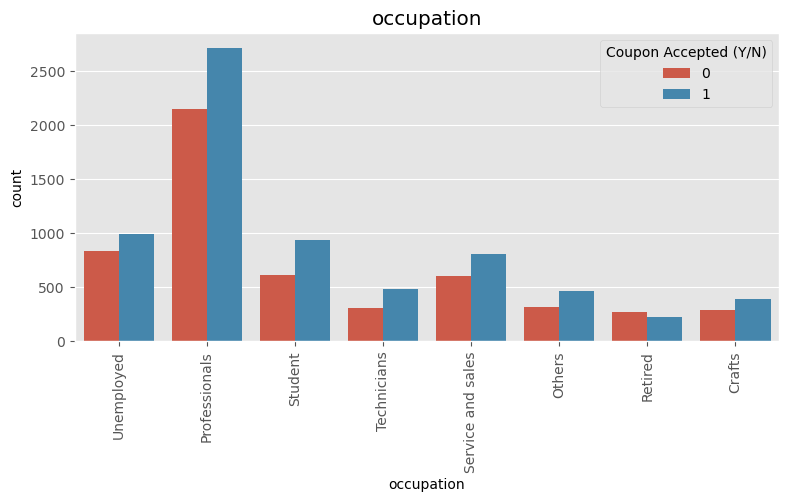

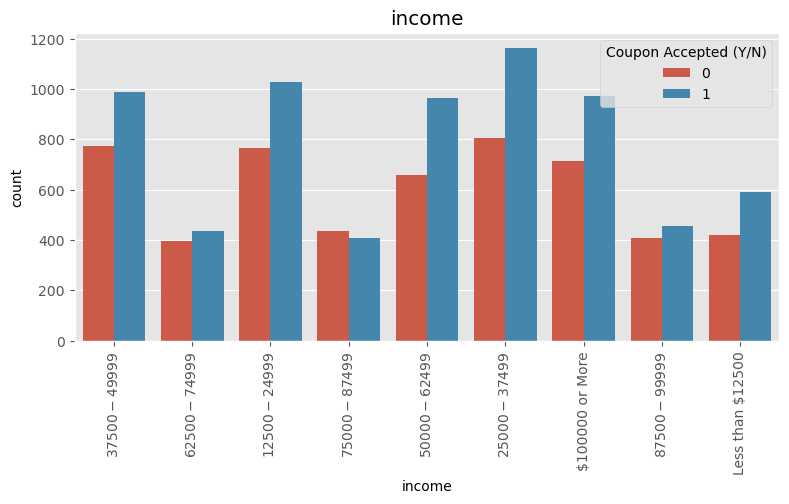

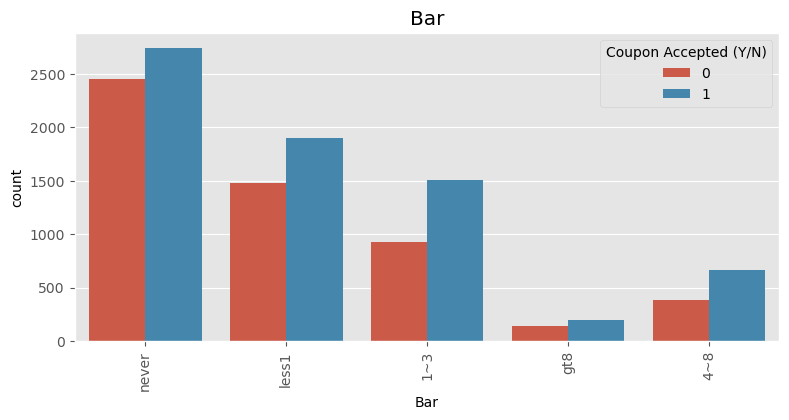

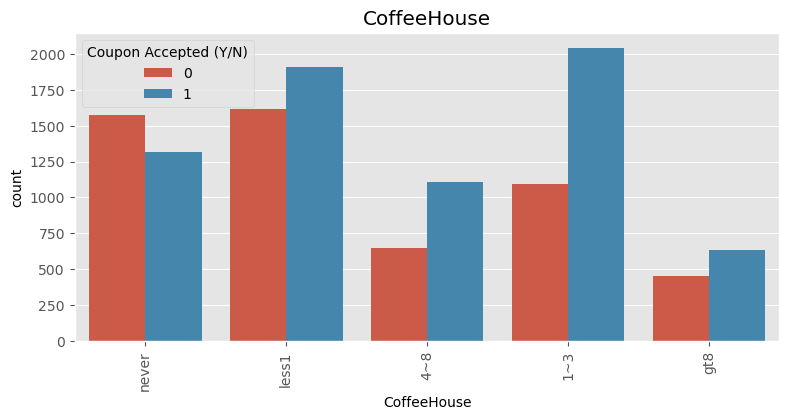

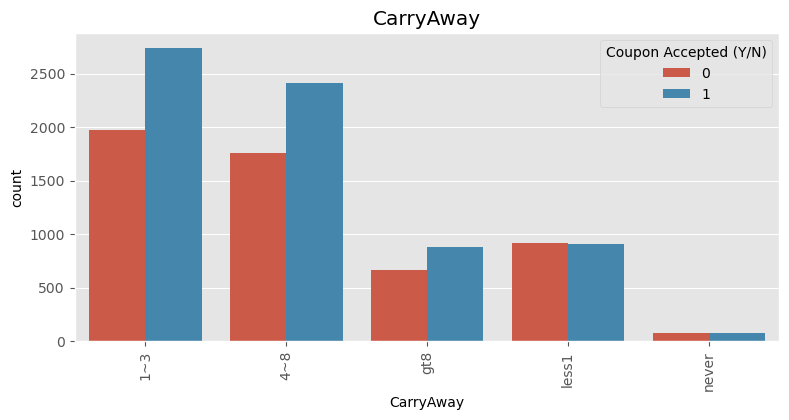

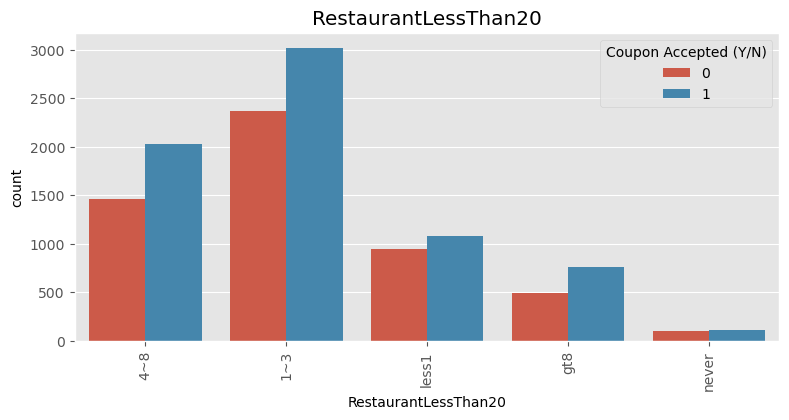

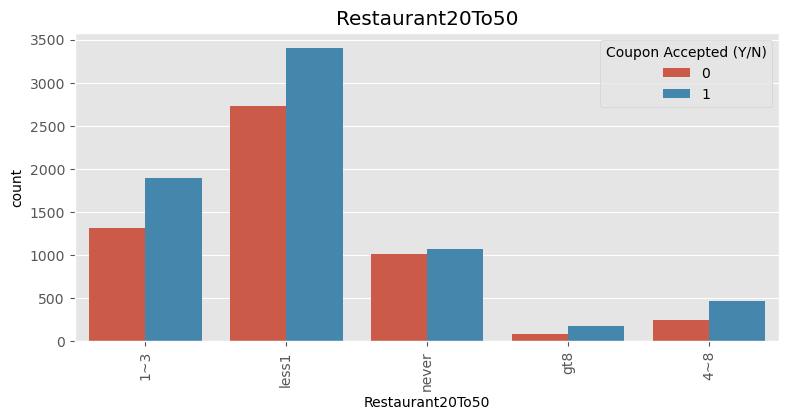

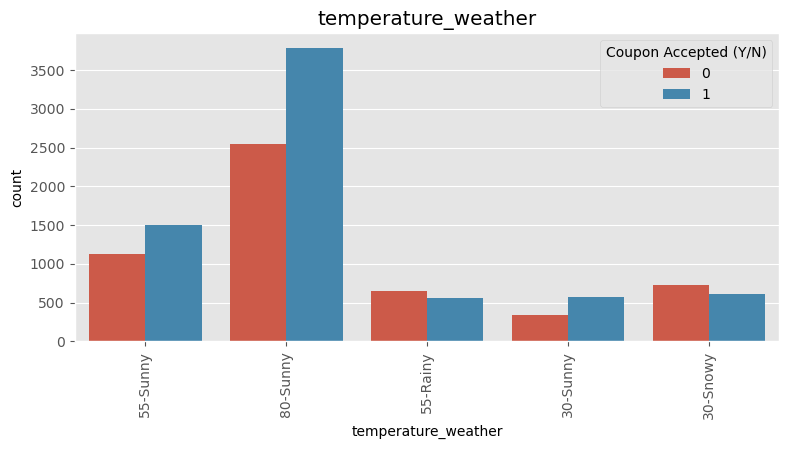

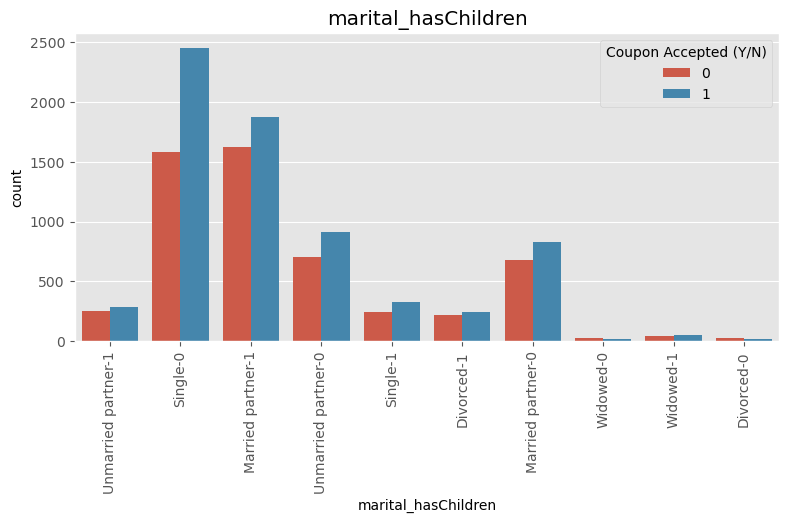

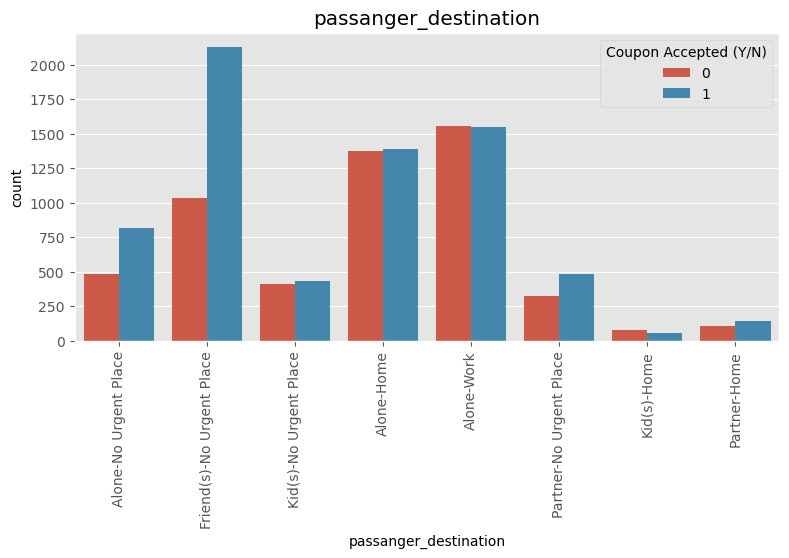

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_var =data_dummy.select_dtypes(include=["object"]).columns

plt.style.use("ggplot")

for i in cat_var:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    
    # Swap x and hue for countplot
    sns.countplot(data=data_dummy, x=i, hue='Coupon Accepted (Y/N)')
    
    plt.title(i)
    plt.xticks(rotation=90)
    
plt.show()  


# # Visualize all numeric/int64 variables available in dataset:-

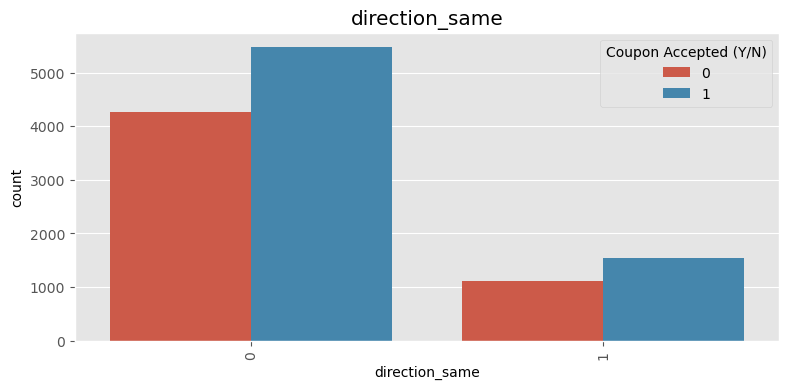

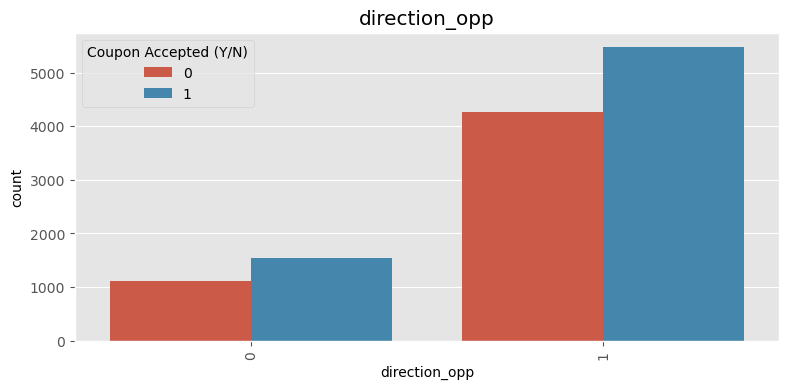

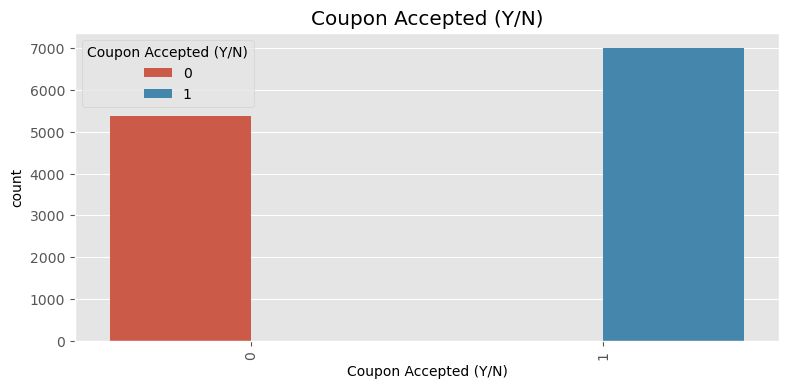

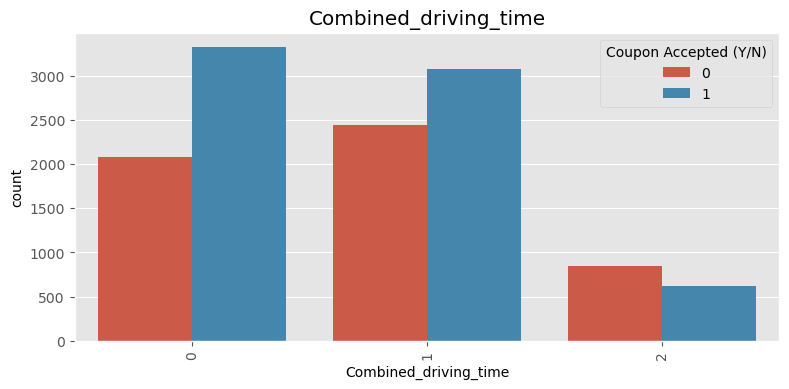

In [36]:
int_var =data_dummy.select_dtypes(include=["int64"]).columns

plt.style.use("ggplot")

for i in int_var:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)

    # Swap x and hue for countplot
    sns.countplot(data=data_dummy, x=i, hue='Coupon Accepted (Y/N)')

    plt.title(i)
    plt.xticks(rotation=90)

plt.show()

# # Feature Encoding the binary variables:-
1. 'gender'
2. 'expiration'


In [37]:
data_dummy['expiration'] = data_dummy['expiration'].map({'2h':0,'1d':1})
data_dummy['gender'] = data_dummy['gender'].map({'Male':0,'Female':1})

# # Encoding the ordinal/categories features:-

In [38]:
#change Object datatypes to Categorical datatypes)

data_ob = data_dummy.select_dtypes(include=['object']).copy()

for i in data_ob.columns:
    data_dummy[i]= data_dummy[i].astype('category')
    
data_dummy.dtypes

coupon                   category
expiration                  int64
gender                      int64
age                      category
education                category
occupation               category
income                   category
Bar                      category
CoffeeHouse              category
CarryAway                category
RestaurantLessThan20     category
Restaurant20To50         category
direction_same              int64
direction_opp               int64
Coupon Accepted (Y/N)       int64
Combined_driving_time       int64
temperature_weather      category
marital_hasChildren      category
passanger_destination    category
dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder

data_encoding=['passanger_destination','temperature_weather', 'age', 'income','coupon','marital_hasChildren', 'education', 'occupation', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

label_encoders = {}

for i in data_encoding:
    label_encoders[i] = LabelEncoder()
    data_dummy[i] = label_encoders[i].fit_transform(data_dummy[i])

# # Splitting data into Training and Testing:-

In [43]:
x = data_dummy.drop('Coupon Accepted (Y/N)', axis=1)  
y = data_dummy['Coupon Accepted (Y/N)'] 

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(f"Training data size: {x_train.shape[0]} samples")
print(f"Testing data size: {x_test.shape[0]} samples")

Training data size: 9914 samples
Testing data size: 2479 samples


# # Standardizing the data for stability and for smooth performance of various machine learning models

In [45]:
# We should map all the feature variables onto the same scale. It is called feature scaling

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# # Creating model using Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression


lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)

lr_model_train_score=lr_model.score(x_train, y_train)
print('Training Score is: ', lr_model_train_score)
lr_model_test_score=lr_model.score(x_test, y_test)
print('Testing score is: ', lr_model_test_score)

Training Score is:  0.6262860601170063
Testing score is:  0.6200080677692618


In [47]:
from sklearn.metrics import classification_report


y_pred_lr = lr_model.predict(x_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.60      0.44      0.51      1110
           1       0.63      0.77      0.69      1369

    accuracy                           0.62      2479
   macro avg       0.62      0.60      0.60      2479
weighted avg       0.62      0.62      0.61      2479



In [48]:
from sklearn.model_selection import GridSearchCV


# Grid of hyperparameters to search:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solver algorithms
    'max_iter': [100, 1000, 10000]  # Maximum number of iterations
}

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_


best_lr_model_score = best_lr_model.score(x_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Score with Best Model:", best_lr_model_score)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Test Score with Best Model: 0.6159741831383623


In [49]:
lr_model=LogisticRegression(C=.05, max_iter= 100, solver= 'lbfgs', penalty='l2', fit_intercept=True)
lr_model.fit(x_train, y_train)

lr_model_train_score=lr_model.score(x_train, y_train)
print('Training Score is: ', lr_model_train_score)
lr_model_test_score=lr_model.score(x_test, y_test)
print('Testing score is: ', lr_model_test_score)

Training Score is:  0.6261851926568489
Testing score is:  0.6200080677692618


In [50]:
y_pred_lr = lr_model.predict(x_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1110
           1       0.63      0.77      0.69      1369

    accuracy                           0.62      2479
   macro avg       0.62      0.60      0.60      2479
weighted avg       0.62      0.62      0.61      2479



In [51]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_lr=lr_model.predict_proba(x_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

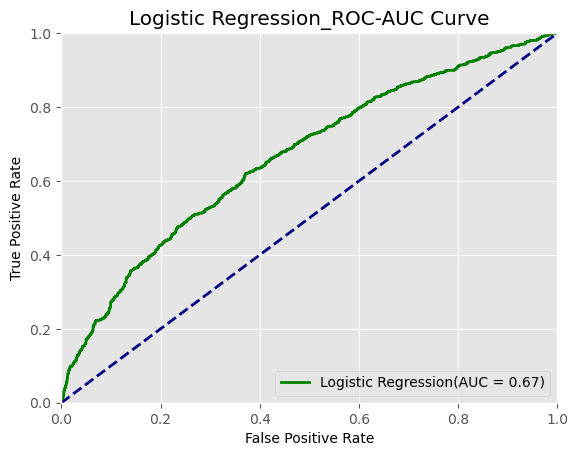

In [51]:
plt.figure(1)
lw = 2
plt.plot(fpr_lr, tpr_lr, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression_ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix


Data_cm_lr = confusion_matrix(y_test,y_pred_lr)
pd.crosstab(y_test, y_pred_lr, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,483,627,1110
1,315,1054,1369
All,798,1681,2479


# # Creating model using Random Forest Classifier:-

In [53]:
from sklearn.ensemble import RandomForestClassifier


rf_model=RandomForestClassifier()

rf_model.fit(x_train, y_train)

rf_model_train_score=rf_model.score(x_train, y_train)
print('Training Score is: ', rf_model_train_score)
rf_model_test_score=rf_model.score(x_test, y_test)
print('Testing score is: ', rf_model_test_score)

Training Score is:  0.9921323381077265
Testing score is:  0.7345703912868092


In [54]:
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68      1110
           1       0.73      0.81      0.77      1369

    accuracy                           0.73      2479
   macro avg       0.73      0.73      0.73      2479
weighted avg       0.73      0.73      0.73      2479



In [55]:
rf_model=RandomForestClassifier(criterion='gini', max_depth=4,
                                max_features=None, min_samples_leaf=20,
                                min_samples_split=20, n_jobs=3,
                               bootstrap=True, n_estimators = 600,
                               oob_score=False, warm_start=False)

rf_model.fit(x_train, y_train)

rf_model_train_score=rf_model.score(x_train, y_train)
print('Training Score is: ', rf_model_train_score)
rf_model_test_score=rf_model.score(x_test, y_test)
print('Testing score is: ', rf_model_test_score)

Training Score is:  0.6888238854145653
Testing score is:  0.6841468334005647


In [56]:

y_pred_rf = rf_model.predict(x_test)

# Evaluate the classifier's performance
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60      1110
           1       0.68      0.82      0.74      1369

    accuracy                           0.68      2479
   macro avg       0.69      0.67      0.67      2479
weighted avg       0.69      0.68      0.68      2479



In [57]:
y_pred_prob_rf=rf_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

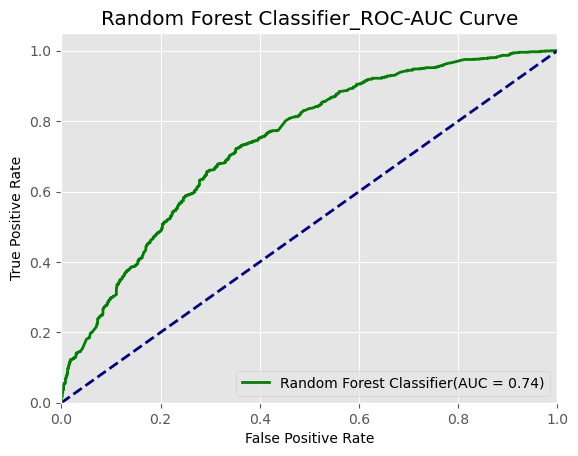

In [58]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw, label='Random Forest Classifier(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier_ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
from sklearn.metrics import roc_curve, auc,confusion_matrix, accuracy_score, roc_auc_score


Data_cm_RF = confusion_matrix(y_test,y_pred_rf)
pd.crosstab(y_test, y_pred_rf, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,580,530,1110
1,253,1116,1369
All,833,1646,2479


# # Creating model using Decision Tree Classifier:-

In [60]:
from sklearn.tree import DecisionTreeClassifier


dt_model= DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_model_train_score=dt_model.score(x_train, y_train)
print('Training Score is: ', dt_model_train_score)
dt_model_test_score=dt_model.score(x_test, y_test)
print('Testing score is: ', dt_model_test_score)

Training Score is:  0.9921323381077265
Testing score is:  0.6551028640580879


In [61]:
y_pred_dt = dt_model.predict(x_test)

# Evaluate the classifier's performance
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1110
           1       0.68      0.70      0.69      1369

    accuracy                           0.66      2479
   macro avg       0.65      0.65      0.65      2479
weighted avg       0.65      0.66      0.65      2479



In [74]:
dt_model= DecisionTreeClassifier(criterion='gini', max_depth=10,
                                max_features='sqrt', min_samples_leaf=35,
                                min_samples_split=15)
dt_model.fit(x_train, y_train)

dt_model_train_score=dt_model.score(x_train, y_train)
print('Training Score is: ', dt_model_train_score)
dt_model_test_score=dt_model.score(x_test, y_test)
print('Testing score is: ', dt_model_test_score)

Training Score is:  0.6882186806536211
Testing score is:  0.6647841871722469


In [76]:
y_pred_dt = dt_model.predict(x_test)

# Evaluate the classifier's performance
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58      1110
           1       0.67      0.78      0.72      1369

    accuracy                           0.66      2479
   macro avg       0.66      0.65      0.65      2479
weighted avg       0.66      0.66      0.66      2479



In [77]:
y_pred_prob_dt=dt_model.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

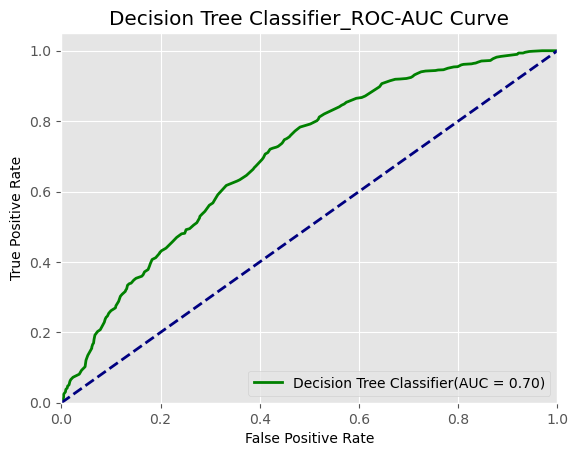

In [78]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree Classifier(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier_ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [79]:
from sklearn.metrics import roc_curve, auc,confusion_matrix, accuracy_score, roc_auc_score


Data_cm_DT = confusion_matrix(y_test,y_pred_dt)
pd.crosstab(y_test, y_pred_dt, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,576,534,1110
1,297,1072,1369
All,873,1606,2479


# #Creating model using XGboost Classifier:-

In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
from xgboost import XGBClassifier

# Create and train the XGBoost model
xgb_model = XGBClassifier()

xgb_model.fit(x_train, y_train)


xgb_model_train_score=xgb_model.score(x_train, y_train)
print('Training Score is: ', xgb_model_train_score)
xgb_model_test_score=xgb_model.score(x_test, y_test)
print('Testing score is: ', xgb_model_test_score)

Training Score is:  0.9165826104498689
Testing score is:  0.7478822105687777


In [82]:
from sklearn.metrics import classification_report

y_pred_xgb = xgb_model.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.74      0.67      0.71      1110
           1       0.75      0.81      0.78      1369

    accuracy                           0.75      2479
   macro avg       0.75      0.74      0.74      2479
weighted avg       0.75      0.75      0.75      2479



In [99]:
from xgboost import XGBClassifier

# Create and train the XGBoost model
xgb_model = XGBClassifier(learning_rate= 0.01, max_depth= 5, n_estimators= 300, subsample=.5, reg_alpha=1, n_jobs=3, random_state=42)

xgb_model.fit(x_train, y_train)


xgb_model_train_score=xgb_model.score(x_train, y_train)
print('Training Score is: ', xgb_model_train_score)
xgb_model_test_score=xgb_model.score(x_test, y_test)
print('Testing score is: ', xgb_model_test_score)

Training Score is:  0.7437966512003228
Testing score is:  0.718031464300121


In [100]:
# Predict the response for the test dataset
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the classifier's performance
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.74      0.57      0.64      1110
           1       0.71      0.84      0.77      1369

    accuracy                           0.72      2479
   macro avg       0.72      0.70      0.71      2479
weighted avg       0.72      0.72      0.71      2479



In [101]:
y_pred_prob_xgb=xgb_model.predict_proba(x_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

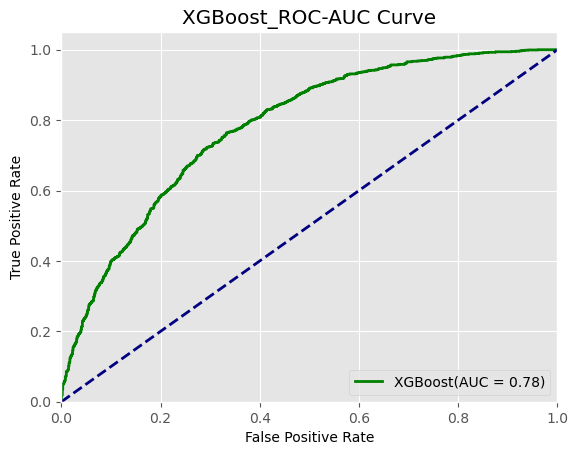

In [102]:
plt.figure(1)
lw = 2
plt.plot(fpr_xgb, tpr_xgb, color='green',
         lw=lw, label='XGBoost(AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost_ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [103]:
from sklearn.metrics import roc_curve, auc,confusion_matrix, accuracy_score, roc_auc_score


Data_cm_xgb = confusion_matrix(y_test,y_pred_dt)
pd.crosstab(y_test, y_pred_xgb, rownames = ['Truth'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Truth,,,
0,632,478,1110
1,221,1148,1369
All,853,1626,2479
